In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
CA_get_rcv_nonrcv = pd.read_csv('../data/ca-cities.csv', usecols = ['RCV', 'city_ascii', 'state_id'])
All_rcv_nonrcv = pd.read_csv('../data/cities.csv', usecols = ['RCV', 'city_ascii', 'state_id'])
All_rcv_nonrcv = pd.concat([All_rcv_nonrcv, CA_get_rcv_nonrcv])
All_rcv_nonrcv.head()

,RCV,city_ascii,state_id
0,NaN,Los Alamos,NM
1,NaN,Albuquerque,NM
2,NaN,Rio Rancho,NM
3,NaN,Farmington,NM
4,NaN,North Valley,NM


In [3]:
All_rcv_nonrcv = All_rcv_nonrcv.rename(columns ={"city_ascii": "Residence_Addresses_City", "state_id":"state"})
All_rcv_nonrcv['RCV'] = All_rcv_nonrcv['RCV'].fillna(0) 
All_rcv_nonrcv = All_rcv_nonrcv.drop_duplicates()
print(All_rcv_nonrcv.shape)
print("No. unique cities:", All_rcv_nonrcv.Residence_Addresses_City.nunique())
All_rcv_nonrcv.head()

(913, 3)
No. unique cities: 889


,RCV,Residence_Addresses_City,state
0,0.0,Los Alamos,NM
1,0.0,Albuquerque,NM
2,0.0,Rio Rancho,NM
3,0.0,Farmington,NM
4,0.0,North Valley,NM


In [4]:
cnt_multiple = All_rcv_nonrcv.groupby(['Residence_Addresses_City', 'state']).size().reset_index()
cnt_multiple.columns = ['Residence_Addresses_City', 'state', 'count']
cnt_multiple[cnt_multiple['count'] > 1]

,Residence_Addresses_City,state,count


In [5]:
filepath = '../data/'
    
voter_turnout_merge = pd.read_csv(f'{filepath}voter_turnout_merged_all_states.csv')
print(voter_turnout_merge.shape)
print("No. unique cities in merged file:", voter_turnout_merge.Residence_Addresses_City.nunique())

voter_turnout_merge = voter_turnout_merge.merge(All_rcv_nonrcv, on = ["Residence_Addresses_City", "state"], how = "inner")
print(voter_turnout_merge.shape)
print("No. unique cities in merged file:", voter_turnout_merge.Residence_Addresses_City.nunique())

voter_turnout_merge.head()

(1484, 69)
No. unique cities in merged file: 214
(1484, 70)
No. unique cities in merged file: 214


,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state,RCV
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652.0,172221.0,CA,1.0
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652.0,130249.0,CA,1.0
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652.0,135633.0,CA,1.0
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652.0,75153.0,CA,1.0
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780.0,9229.0,...,10653.0,16014.0,8674.0,84.058580,81.423073,49.752550,70359.0,41879.0,CA,1.0


In [6]:
voter_turnout_merge[((voter_turnout_merge['Residence_Addresses_City'] == 'Burbank')|(voter_turnout_merge['Residence_Addresses_City'] ==  'Montebello') )& (voter_turnout_merge['elec_type'] == 'Local_or_Municipal')]

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state,RCV
64,Montebello,2019_03_05,2019,Local_or_Municipal,3388.0,41.0,23123.0,1637.0,2970.0,431.0,...,6789.0,1413.0,930.0,16.034952,13.698630,60.603591,47583.0,3313.0,CA,0.0
66,Montebello,2017_03_07,2017,Local_or_Municipal,3388.0,41.0,23123.0,1637.0,2970.0,389.0,...,6789.0,1007.0,757.0,11.427599,11.150390,58.872072,47583.0,2563.0,CA,0.0
72,Burbank,2017_04_11,2017,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,375.0,...,8311.0,4551.0,1228.0,17.066037,14.775599,58.266067,82399.0,7763.0,CA,0.0
73,Burbank,2017_03_07,2017,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,439.0,...,8311.0,3929.0,1032.0,14.733566,12.417278,53.472870,82399.0,7400.0,CA,0.0
74,Burbank,2017_02_28,2017,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,391.0,...,8311.0,4269.0,1119.0,16.008550,13.464084,57.550114,82399.0,7246.0,CA,0.0
75,Burbank,2015_04_14,2015,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,389.0,...,8311.0,4590.0,1220.0,17.212285,14.679341,58.083891,82399.0,7634.0,CA,0.0


In [7]:
# perc_turnout_asian and other races are calculated per election date, election type and city level
# we want to aggregate at election type level and city level, so remove the those columns

def select_cols(df):
    select_df = df[[col for col in df.columns\
                    if "RCV" in col or\
                    "elec_type" in col or\
                    "voters_asian" in col or\
                    "voters_black" in col or\
                    "voters_hispanic" in col or\
                    "voters_white" in col or\
                    "voters_others" in col or\
                    "perc_turnout_asian"  in col or\
                    "perc_turnout_black"  in col or\
                    "perc_turnout_hispanic"  in col or\
                    "perc_turnout_white"  in col or\
                    "perc_turnout_others"  in col 
                   ]]
    return select_df

### Average turnout for white, black, Hispanic, and Asian voters in local, consolidated, and general elections
-    Grouped bar graph by election type


In [8]:
def get_elec_turnout_race(df, RCV_nonRCV = False):
    if RCV_nonRCV == False:
        agg_df = df[[col for col in df.columns \
                        if "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby('elec_type').mean().reset_index()
    if RCV_nonRCV == True:
        agg_df = df[[col for col in df.columns \
                        if "RCV" in col or\
                        "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby(['elec_type', 'RCV']).mean().reset_index()
    return agg_df
  

In [9]:
# fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 16), sharey='row', sharex='col')
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle('Voter turnout on selected election per race', fontsize=15, y=0.95)

# for s, ax  in zip(voter_turnout_merge.state.unique(), axs.ravel()):
# # for s in voter_turnout_merge.state.unique():
#     ### Colorado
#     if s=='CO':
#         filepath = '../data/VM2--CO--2022-04-26/'
#     ### Maryland
#     if s=='MD':
#         filepath = '../data/VM2--MD--2022-04-08/'
#     ### Maine
#     if s=='ME':
#         filepath = '../data/VM2--ME--2022-03-02/'
#     ### Minnesota
#     if s=='MN':
#         filepath = '../data/VM2--MN--2022-03-25/'
#     ### New Mexico
#     if s=='NM':
#         filepath = '../data/VM2--NM--2022-03-30/'
#     ### Utah
#     if s=='UT':
#         filepath = '../data/VM2--UT--2022-03-30/'
#     ### Vermont
#     if s=='VT':
#         filepath = '../data/VM2--VT--2022-04-20/'
        
#     voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
#     elec_turnout_per_race = get_elec_turnout_race(voter_turnout_merge_race, RCV_nonRCV = False) 
#     elec_turnout_per_race.columns = [col.replace('perc_turnout_', '') for col in elec_turnout_per_race.columns]
#     print(s, elec_turnout_per_race.elec_type.unique())
#     elec_turnout_per_race = elec_turnout_per_race.set_index('elec_type')
#     print(elec_turnout_per_race.head())
    
#     fig = elec_turnout_per_race.plot.bar(ax=ax)
#     ax.set_title(s)
#     if s == 'CA':
#         ax.set_ylabel("percentage")
#     ax.set_xlabel("election type")
#     ax.set_ylabel("percentage")
#     ax.set_ylim(0, 80)
#     ax.tick_params(axis='x', labelrotation = 15)

# ax.figure.savefig('../data/elec_turnout_per_race.jpg')

In [10]:
voter_turnout_merge_race_ca = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == 'CA'])
voter_turnout_merge_race_ca[voter_turnout_merge_race_ca['elec_type']=='Local_or_Municipal']

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,voted_voters_black,voted_voters_hispanic,voted_voters_others,voted_voters_white,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white,RCV
64,Local_or_Municipal,3388.0,41.0,23123.0,1637.0,2970.0,431.0,1.0,2187.0,262.0,432.0,12.721370,2.439024,9.458115,16.004887,14.545455,0.0
66,Local_or_Municipal,3388.0,41.0,23123.0,1637.0,2970.0,389.0,1.0,1716.0,113.0,344.0,11.481700,2.439024,7.421182,6.902871,11.582492,0.0
72,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,375.0,18.0,1171.0,822.0,5377.0,9.130752,3.870968,7.523773,7.434877,16.410303,0.0
73,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,439.0,39.0,1190.0,585.0,5147.0,10.689067,8.387097,7.645849,5.291245,15.708356,0.0
74,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,391.0,17.0,1109.0,702.0,5027.0,9.520331,3.655914,7.125418,6.349493,15.342123,0.0
75,Local_or_Municipal,4107.0,465.0,15564.0,11056.0,32766.0,389.0,16.0,1172.0,1143.0,4914.0,9.471634,3.440860,7.530198,10.338278,14.997253,0.0
93,Local_or_Municipal,679.0,29.0,30868.0,433.0,3193.0,48.0,3.0,1913.0,39.0,305.0,7.069219,10.344828,6.197356,9.006928,9.552145,0.0
145,Local_or_Municipal,8883.0,4945.0,78806.0,5410.0,77680.0,682.0,518.0,3310.0,349.0,7202.0,7.677586,10.475228,4.200188,6.451017,9.271370,0.0
147,Local_or_Municipal,8883.0,4945.0,78806.0,5410.0,77680.0,438.0,245.0,3875.0,294.0,9288.0,4.930767,4.954499,4.917138,5.434381,11.956746,0.0


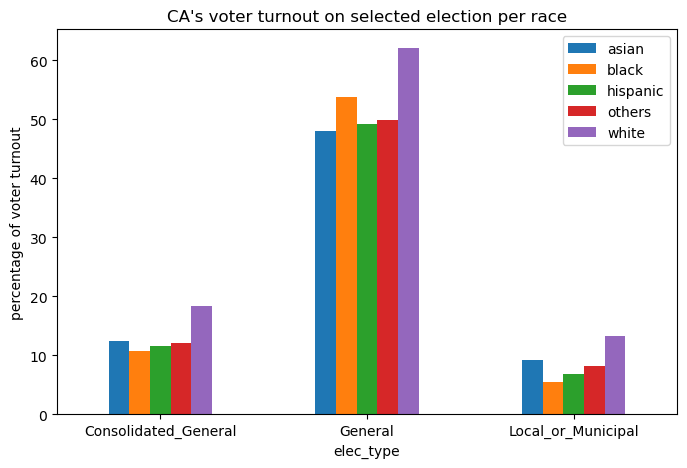

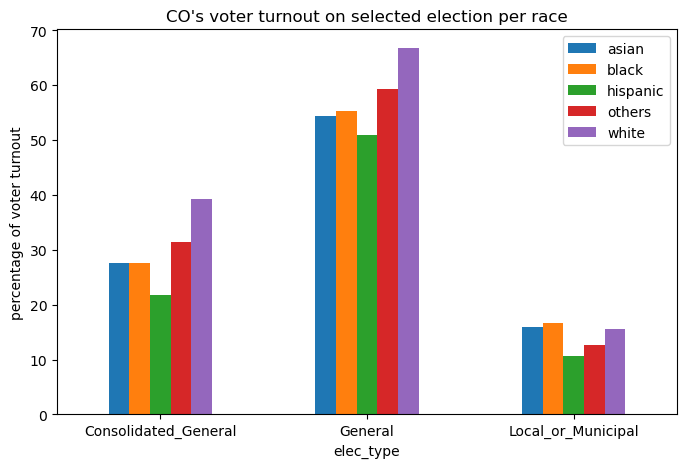

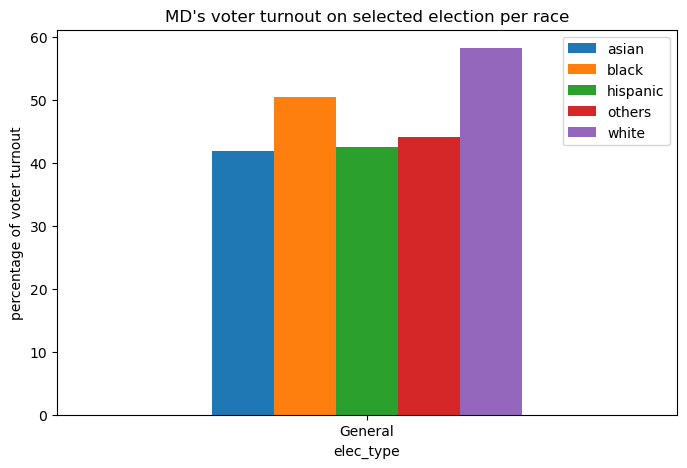

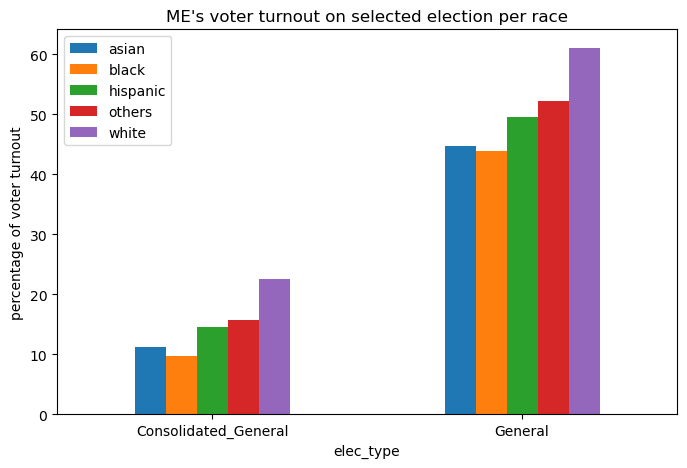

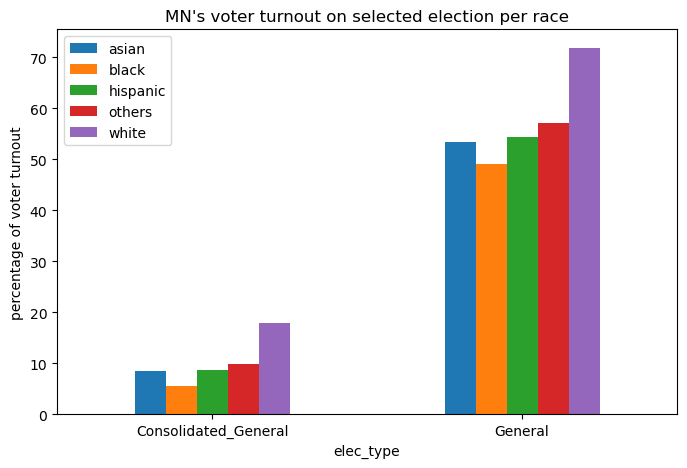

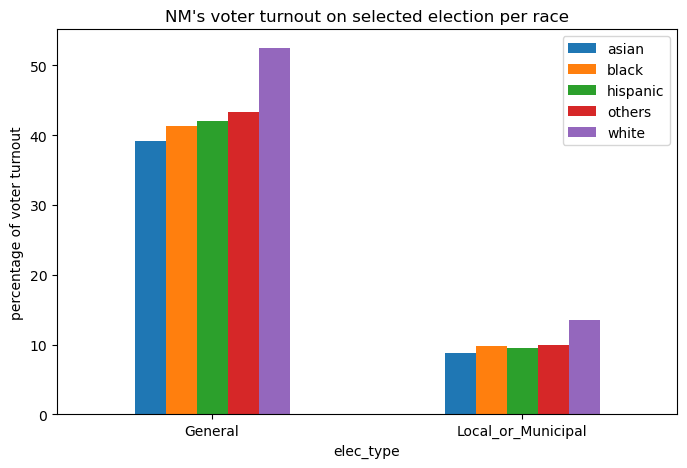

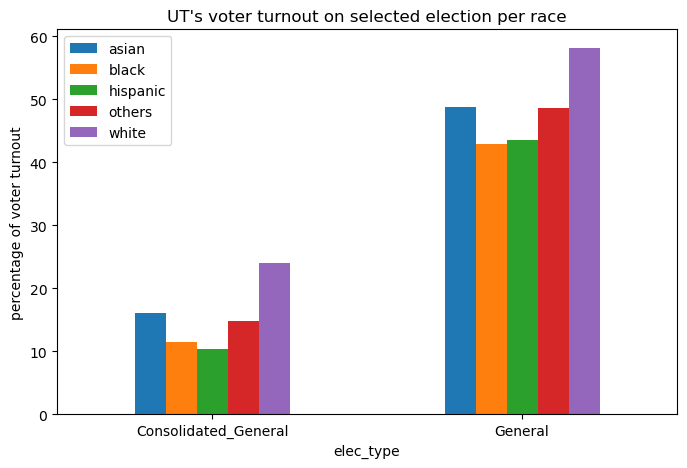

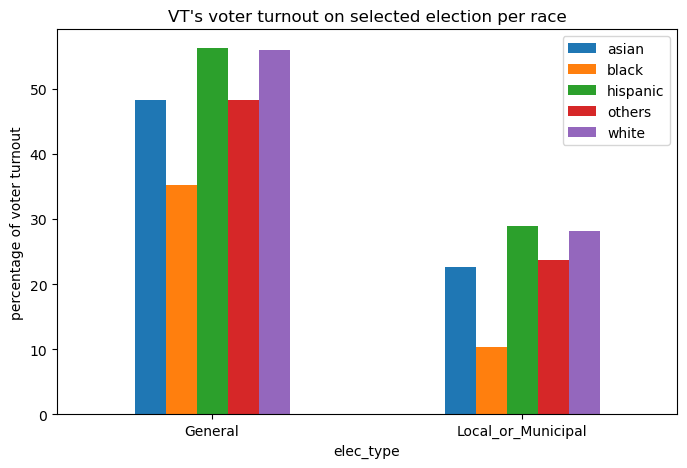

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

for s in voter_turnout_merge.state.unique():
    ### California
    if s=='CA':
        filepath = '../data/VM2--CA--2022-04-25'      
    ### Colorado
    if s=='CO':
        filepath = '../data/VM2--CO--2022-04-26/'
    ### Maryland
    if s=='MD':
        filepath = '../data/VM2--MD--2022-04-08/'
    ### Maine
    if s=='ME':
        filepath = '../data/VM2--ME--2022-03-02/'
    ### Minnesota
    if s=='MN':
        filepath = '../data/VM2--MN--2022-03-25/'
    ### New Mexico
    if s=='NM':
        filepath = '../data/VM2--NM--2022-03-30/'
    ### Utah
    if s=='UT':
        filepath = '../data/VM2--UT--2022-03-30/'
    ### Vermont
    if s=='VT':
        filepath = '../data/VM2--VT--2022-04-20/'
        
    
    voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
#     print(voter_turnout_merge_race.head())
    elec_turnout_per_race = get_elec_turnout_race(voter_turnout_merge_race, RCV_nonRCV = False) 
    elec_turnout_per_race.columns = [col.replace('perc_turnout_', '') for col in elec_turnout_per_race.columns]
    
    fig = elec_turnout_per_race.plot(x='elec_type',
                                 kind='bar',
                                 stacked=False,
                                 title=f'{s}\'s voter turnout on selected election per race',
                                 figsize=(8, 5), 
                                 rot=0, ylabel = "percentage of voter turnout").legend(["asian", "black", "hispanic", "others", "white"]).get_figure()
    
    fig.savefig(f'{filepath}elec_turnout_per_race.jpg')
    

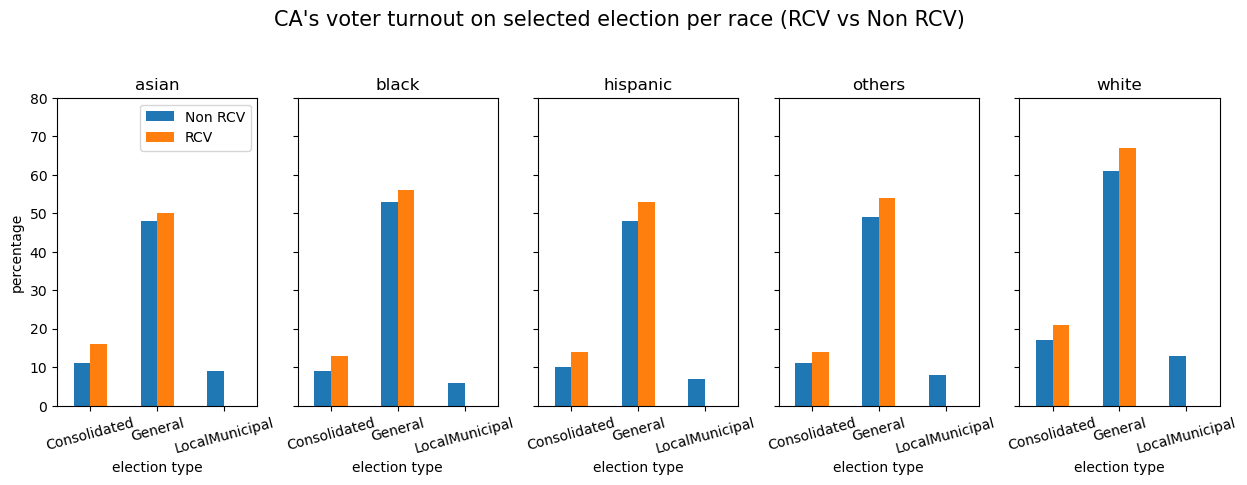

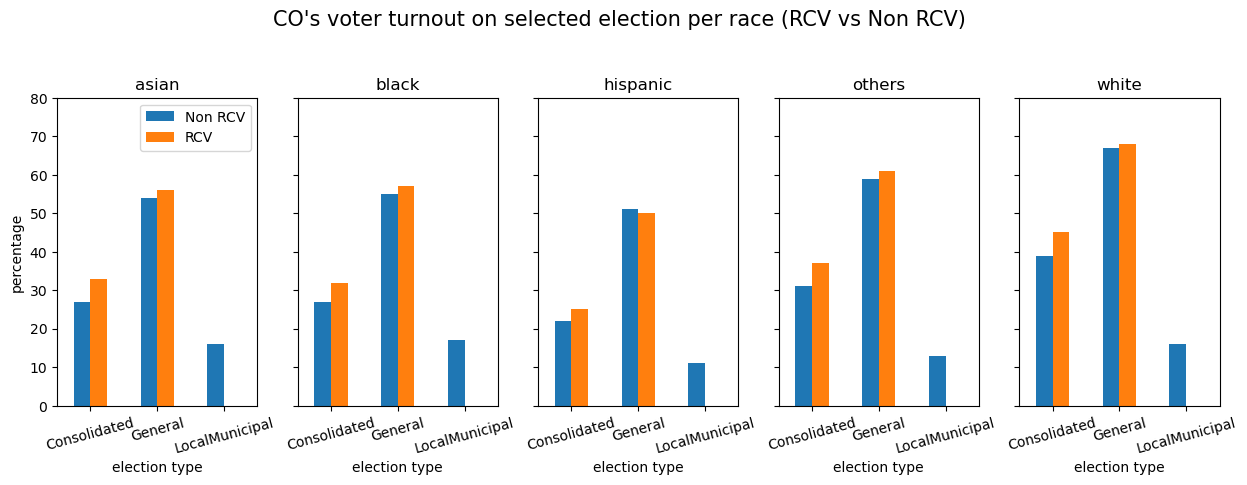

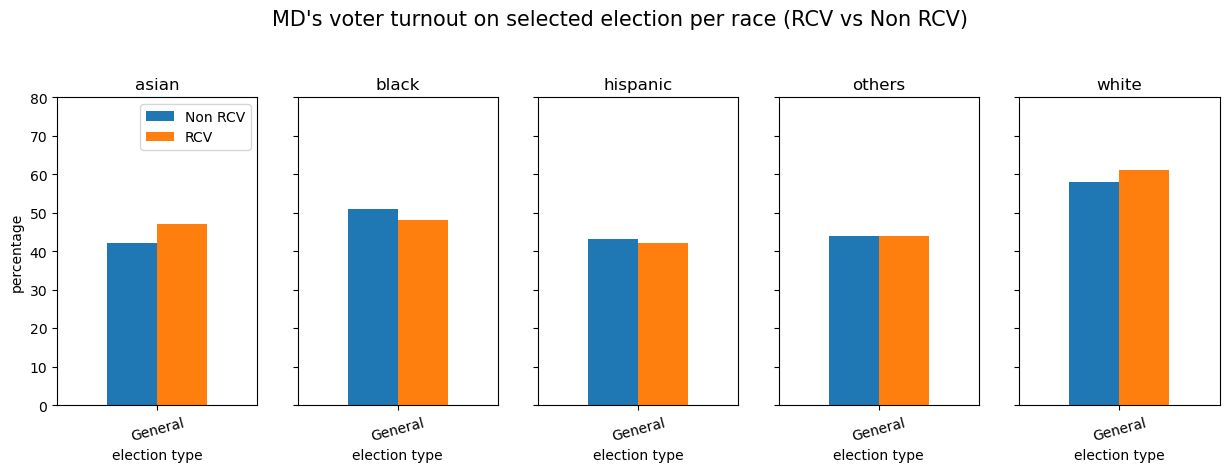

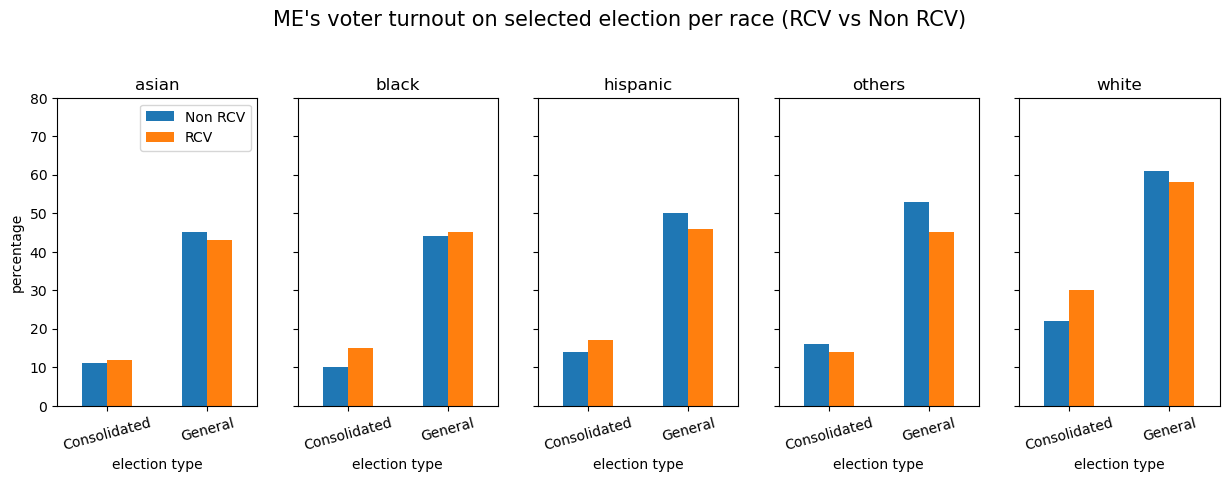

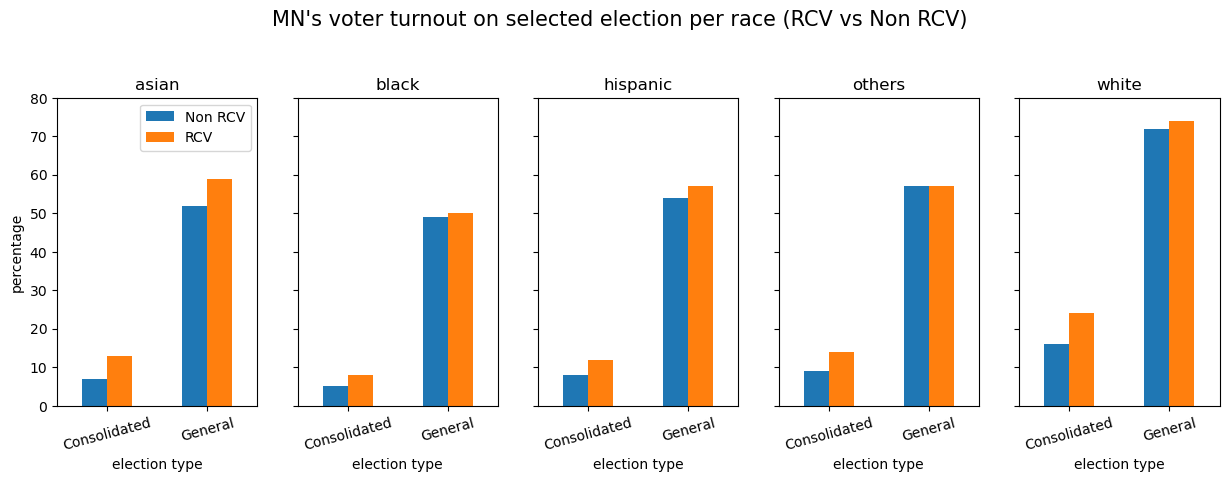

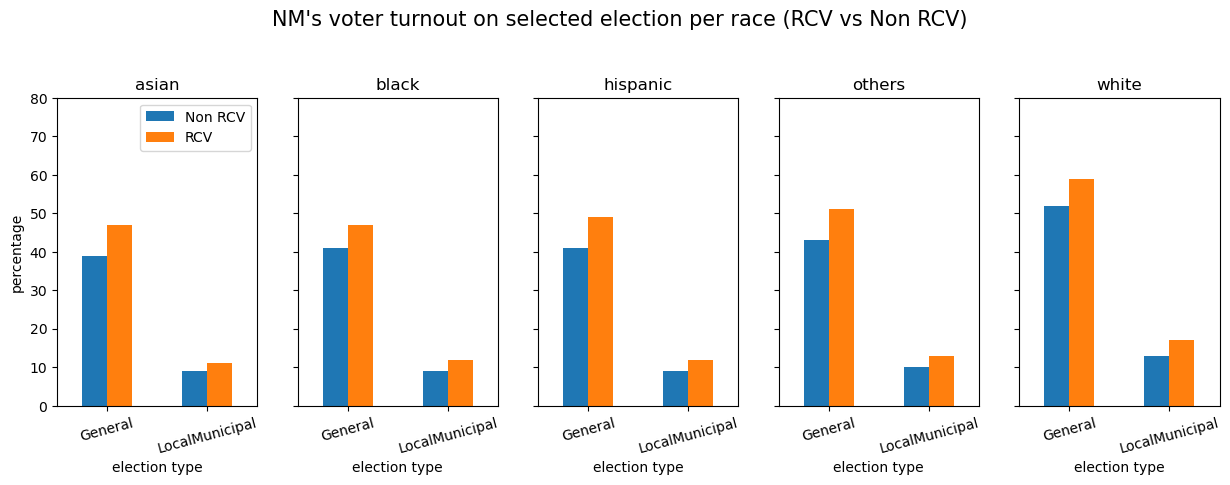

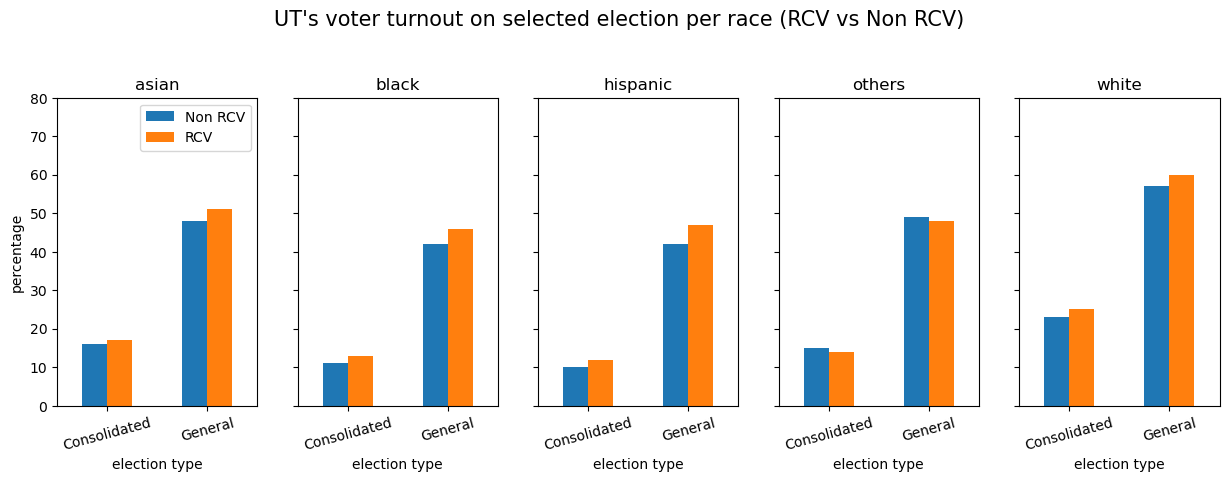

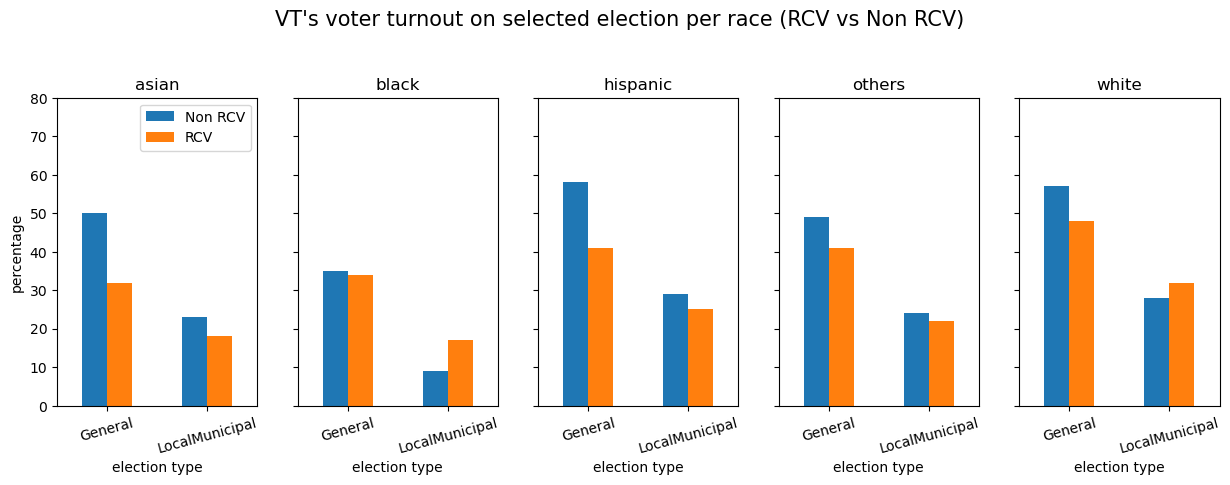

In [12]:
for s in voter_turnout_merge.state.unique():
    ### California
    if s=='CA':
        filepath = '../data/VM2--CA--2022-04-25'  
    ### Colorado
    if s=='CO':
        filepath = '../data/VM2--CO--2022-04-26/'
    ### Maryland
    if s=='MD':
        filepath = '../data/VM2--MD--2022-04-08/'
    ### Maine
    if s=='ME':
        filepath = '../data/VM2--ME--2022-03-02/'
    ### Minnesota
    if s=='MN':
        filepath = '../data/VM2--MN--2022-03-25/'
    ### New Mexico
    if s=='NM':
        filepath = '../data/VM2--NM--2022-03-30/'
    ### Utah
    if s=='UT':
        filepath = '../data/VM2--UT--2022-03-30/'
    ### Vermont
    if s=='VT':
        filepath = '../data/VM2--VT--2022-04-20/'
        
    voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
    elec_turnout_per_race_both =get_elec_turnout_race(voter_turnout_merge_race, RCV_nonRCV = True) 
    elec_turnout_per_race_both = elec_turnout_per_race_both.replace({"Local_or_Municipal": "LocalMunicipal", 
                                                                    "Consolidated_General":"Consolidated"})
    elec_turnout_per_race_both = elec_turnout_per_race_both.pivot(index = 'elec_type', columns = 'RCV')
#     print(elec_turnout_per_race_both.head())
    elec_turnout_per_race_both = round(elec_turnout_per_race_both)
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), sharey='row')#, sharex='col')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(f'{s}\'s voter turnout on selected election per race (RCV vs Non RCV)', fontsize=15, y=1.1)

    races = ['perc_turnout_asian', 'perc_turnout_black', 'perc_turnout_hispanic',
              'perc_turnout_others', 'perc_turnout_white']

    # loop through tickers and axes
    for race, ax in zip(races, axs.ravel()):
        fig = elec_turnout_per_race_both[[race]].plot.bar(ax=ax)
        ax.set_title(race.replace('perc_turnout_', ''))
        if race == 'perc_turnout_asian':
            ax.set_ylabel("percentage")
            ax.legend(labels=["Non RCV", "RCV"])
        else:
            ax.get_legend().remove()
        ax.set_xlabel("election type")
        ax.set_ylim(0, 80)
        ax.tick_params(axis='x', labelrotation = 15)
#         ax.bar_label(ax.containers[0], label_type='edge')
#         ax.bar_label(ax.containers[1], label_type='edge')

    ax.figure.savefig(f'{filepath}elec_turnout_per_race_sep.jpg')
    

In [13]:
# elec_turnout_per_race_RCV = elec_turnout_per_race_RCV_nonRCV[elec_turnout_per_race_RCV_nonRCV['RCV'] == 1].drop(columns = ['RCV'])
# elec_turnout_per_race_nonRCV = elec_turnout_per_race_RCV_nonRCV[elec_turnout_per_race_RCV_nonRCV['RCV'] == 0].drop(columns = ['RCV'])
# fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), sharey =True)
# # plot first pandas frame in subplot style
# elec_turnout_per_race_RCV.plot(x='elec_type',
#                                  kind='bar',
#                                  stacked=False,
#                                  title='RCV cities',
#                                  rot=0, 
#                                ax = ax1, 
#                                legend=None, 
#                                xlabel ="election type", 
#                                ylabel = "percentage of voter turnout")

# # plot second pandas frame in subplot style
# elec_turnout_per_race_nonRCV.plot(x='elec_type',
#                                  kind='bar',
#                                  stacked=False,
#                                  title='Non RCV cities',
#                                  rot=0, ax = ax2, xlabel ="election type").legend(["asian", "black", "hispanic", "others", "white"])
# fig.suptitle(f'{state}\'s voter turnout on selected election per race', fontsize=15)

# plt.show()

# fig.savefig(f'{filepath}elec_turnout_per_race_sep.jpg')

### Average gap in turnout between white and non-white voters in local, consolidated, and general elections
-    Bar graph by election type

In [14]:
# sum up total_voters and voted_voters for all races except for white

def add_non_white(df):

    non_white_cols = [col for col in df if "elec_type" not in col and "voters_white" not in col]
    for v in ['total_voters_', 'voted_voters_']:
        df[v+'non_white'] = df[[col for col in non_white_cols if v in col ]].sum(axis =1)

    df['perc_turnout_non_white'] =  df['voted_voters_non_white']/df['total_voters_non_white']*100

    ## find the gap of voter's turnout for each record (city, election type and election date levels)
    df['gap_white_non_white'] = df['perc_turnout_white']  - df['perc_turnout_non_white']  

    return df

In [15]:
# voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == 'CA'])
# voter_turnout_merge_race = add_non_white(voter_turnout_merge_race)

# ## take the average per election type
# elec_turnout_per_whiteOrNot = voter_turnout_merge_race[['elec_type', 'gap_white_non_white']].groupby('elec_type').mean().reset_index()
# elec_turnout_per_whiteOrNot = elec_turnout_per_whiteOrNot.replace({"Local_or_Municipal": "LocalMunicipal", 
#                                                                 "Consolidated_General":"Consolidated"})
# #     elec_turnout_per_whiteOrNot = elec_turnout_per_whiteOrNot.set_index('elec_type')
# print(elec_turnout_per_whiteOrNot)
# elec_turnout_per_whiteOrNot.plot(x = 'elec_type', kind = 'bar')


In [16]:
 voter_turnout_merge.state.unique()

array(['CA', 'CO', 'MD', 'ME', 'MN', 'NM', 'UT', 'VT'], dtype=object)

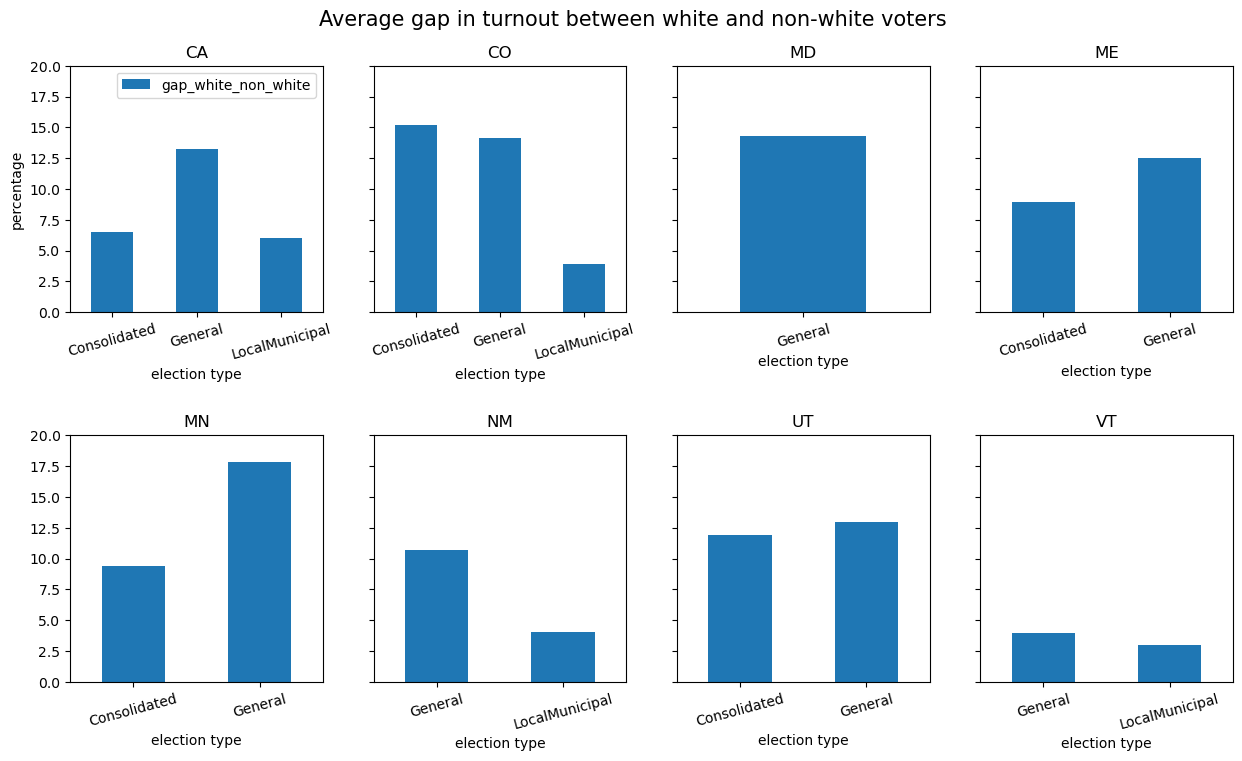

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharey='row')#, sharex='col')
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Average gap in turnout between white and non-white voters', fontsize=15, y=0.95)

for s, ax in zip(voter_turnout_merge.state.unique(), axs.ravel()):
# for s in ['CA']:
    ### California
    if s=='CA':
        filepath = '../data/VM2--CA--2022-04-25'  
    ### Colorado
    if s=='CO':
        filepath = '../data/VM2--CO--2022-04-26/'
    ### Maryland
    if s=='MD':
        filepath = '../data/VM2--MD--2022-04-08/'
    ### Maine
    if s=='ME':
        filepath = '../data/VM2--ME--2022-03-02/'
    ### Minnesota
    if s=='MN':
        filepath = '../data/VM2--MN--2022-03-25/'
    ### New Mexico
    if s=='NM':
        filepath = '../data/VM2--NM--2022-03-30/'
    ### Utah
    if s=='UT':
        filepath = '../data/VM2--UT--2022-03-30/'
    ### Vermont
    if s=='VT':
        filepath = '../data/VM2--VT--2022-04-20/'
        
    
    voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
    voter_turnout_merge_race = add_non_white(voter_turnout_merge_race)

    ## take the average per election type
    elec_turnout_per_whiteOrNot = voter_turnout_merge_race[['elec_type', 'gap_white_non_white']].groupby('elec_type').mean().reset_index()
    elec_turnout_per_whiteOrNot = elec_turnout_per_whiteOrNot.replace({"Local_or_Municipal": "LocalMunicipal", 
                                                                    "Consolidated_General":"Consolidated"})
#     elec_turnout_per_whiteOrNot = elec_turnout_per_whiteOrNot.set_index('elec_type')
    fig = elec_turnout_per_whiteOrNot.plot(x = 'elec_type', subplots=True, kind = 'bar', ax=ax)
    ax.set_title(s)
    if s == 'CA':
        ax.set_ylabel("percentage")
    else:
        ax.get_legend().remove()
    ax.set_xlabel("election type")
    ax.set_ylim(0, 20)
    ax.tick_params(axis='x', labelrotation = 15)
# plt.show()
  
ax.figure.savefig('../data/elec_turnout_per_whiteOrNot.jpg')

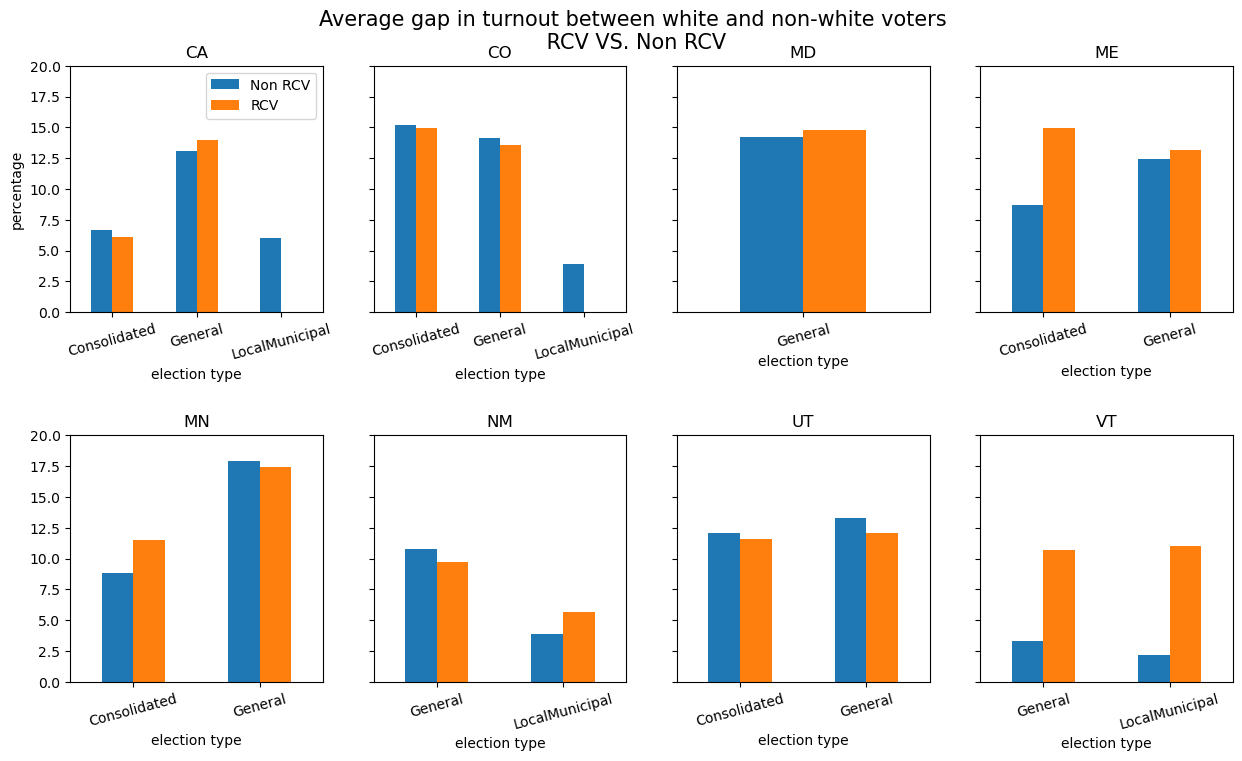

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharey='row')#, sharex='col')
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Average gap in turnout between white and non-white voters\n RCV VS. Non RCV', fontsize=15, y=0.95)

for s, ax  in zip(voter_turnout_merge.state.unique(), axs.ravel()):
    ### California
    if s=='CA':
        filepath = '../data/VM2--CA--2022-04-25'  
    ### Colorado
    if s=='CO':
        filepath = '../data/VM2--CO--2022-04-26/'
    ### Maryland
    if s=='MD':
        filepath = '../data/VM2--MD--2022-04-08/'
    ### Maine
    if s=='ME':
        filepath = '../data/VM2--ME--2022-03-02/'
    ### Minnesota
    if s=='MN':
        filepath = '../data/VM2--MN--2022-03-25/'
    ### New Mexico
    if s=='NM':
        filepath = '../data/VM2--NM--2022-03-30/'
    ### Utah
    if s=='UT':
        filepath = '../data/VM2--UT--2022-03-30/'
    ### Vermont
    if s=='VT':
        filepath = '../data/VM2--VT--2022-04-20/'
        
    
    voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
    voter_turnout_merge_race = add_non_white(voter_turnout_merge_race)

    elec_turnout_per_whiteOrNot_both = voter_turnout_merge_race[['elec_type', 'gap_white_non_white','RCV']].groupby(['RCV', 'elec_type']).mean().reset_index()
    elec_turnout_per_whiteOrNot_both = elec_turnout_per_whiteOrNot_both.replace({"Local_or_Municipal": "LocalMunicipal", 
                                                                    "Consolidated_General":"Consolidated"})
    elec_turnout_per_whiteOrNot_both = elec_turnout_per_whiteOrNot_both.pivot_table(index = 'elec_type', columns = 'RCV')
    fig = elec_turnout_per_whiteOrNot_both.plot.bar(ax=ax)

    ax.set_title(s)
    if s == 'CA':
        ax.set_ylabel("percentage")
        ax.legend(labels=["Non RCV", "RCV"])
    else:
        ax.get_legend().remove()
    ax.set_xlabel("election type")
    ax.set_ylim(0, 20)
    ax.tick_params(axis='x', labelrotation = 15)

ax.figure.savefig('../data/elec_turnout_per_whiteOrNot_sep.jpg')
    
    

In [19]:
# for s in voter_turnout_merge.state.unique():
#     ### Colorado
#     if s=='CO':
#         filepath = '../data/VM2--CO--2022-04-26/'
#     ### Maryland
#     if s=='MD':
#         filepath = '../data/VM2--MD--2022-04-08/'
#     ### Maine
#     if s=='ME':
#         filepath = '../data/VM2--ME--2022-03-02/'
#     ### Minnesota
#     if s=='MN':
#         filepath = '../data/VM2--MN--2022-03-25/'
#     ### New Mexico
#     if s=='NM':
#         filepath = '../data/VM2--NM--2022-03-30/'
#     ### Utah
#     if s=='UT':
#         filepath = '../data/VM2--UT--2022-03-30/'
#     ### Vermont
#     if s=='VT':
#         filepath = '../data/VM2--VT--2022-04-20/'
            
#     voter_turnout_merge_race = select_cols(voter_turnout_merge[voter_turnout_merge['state'] == s])
#     voter_turnout_merge_race = add_non_white(voter_turnout_merge_race)

#     elec_turnout_per_whiteOrNot_both = voter_turnout_merge_race[['elec_type', 'gap_white_non_white','RCV']].groupby(['RCV', 'elec_type']).mean().reset_index()
#     elec_turnout_per_race_both = elec_turnout_per_race_both.replace({"Local_or_Municipal": "LocalMunicipal", 
#                                                                     "Consolidated_General":"Consolidated"})
#     elec_turnout_per_whiteOrNot_both = elec_turnout_per_whiteOrNot_both.pivot_table('gap_white_non_white', ['elec_type'], 'RCV').reset_index()

#     fig = elec_turnout_per_whiteOrNot_both.plot(x='elec_type',
#                                                kind='bar',
#                                                stacked=False,
#                                                title=f'{s}\'s average gap in turnout between white and non-white voters\n RCV VS. Non RCV',
#                                                figsize=(8, 5),
#                                                rot=0, legend = None, ylabel = "average gap in turnout").\
#                                             legend(["NonRCV", "RCV"]).get_figure()
#     fig.savefig(f'{filepath}elec_turnout_per_whiteOrNot_sep.jpg')